---

## 7RO - TAREA 4 SVM

### Aarón Medina Melián

---

Importamos las librerías necesarias

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Cargar el conjunto de datos de pingüinos

In [28]:
penguins = sns.load_dataset('penguins')

Verificar y manejar valores nulos si es necesario

In [29]:
penguins = penguins.dropna()

Seleccionar dos características para la visualización

In [30]:
features = ['bill_length_mm', 'bill_depth_mm']

Convertir las variables categóricas en variables numéricas

In [31]:
le = LabelEncoder()
penguins['species'] = le.fit_transform(penguins['species'])

Dividir el conjunto de datos en características (X) y etiquetas (y)

In [32]:
X = penguins[features]
y = penguins['species']

Dividir el conjunto de datos en conjuntos de entrenamiento y prueba

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Crear un clasificador SVM con kernel lineal

In [34]:
svm_classifier = SVC(kernel='linear', C=1)

Entrenar el clasificador

In [35]:
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

Realizar predicciones en el conjunto de prueba

In [36]:
y_pred = svm_classifier.predict(X_test)

Visualizar la clasificación en un gráfico de dispersión

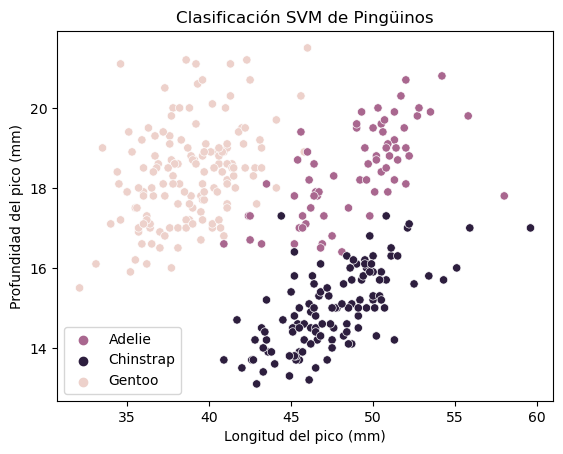

In [37]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins)
plt.title('Clasificación SVM de Pingüinos')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Profundidad del pico (mm)')
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = penguins['species'].unique()
legend_labels = [f'{le.inverse_transform([int(label)])[0]}' for label in unique_labels]

plt.legend(handles=handles[1:] + [handles[0]], labels=legend_labels)
plt.show()